# Module 5: Multilayer Perceptron - Practice

In this session, you will create a **Multilayer Perceptron** (MLP) model to practice on the **Iris** dataset,
to get more familiarized with TensorFlow.

TensorFlow API reference
* [tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
* [tf.train.GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)
* [tf.train.AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer)
* [tf.Session](https://www.tensorflow.org/api_docs/python/tf/Session)
* [tf.layers.dense](https://www.tensorflow.org/api_docs/python/tf/layers/dense)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf

import tf_threads
tfconfig = tf_threads.limit(tf, 2)

from sklearn.preprocessing import scale, LabelBinarizer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Load dataset

**Pull** iris["data"] into **X** and iris["target"] into **y**.

**Standardize** X using [sklearn.processing.scale()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).

In [2]:
iris = datasets.load_iris()
# Add code below this comment  (Question #P5001)
# ----------------------------------
X = np.array(iris.data)
y = np.array(iris.target)

## Processing

1. Create training/validation split **X_train, X_test, y_train, y_test** and hold out 5% of data.
2. Print class distribution.

In [3]:
# Add code below this comment  (Question #P5002)
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5)
print('Class distribution:', {i:np.sum(y==i) for i in np.unique(y)})

Class distribution: {0: 50, 1: 50, 2: 50}


## Create MLP classifier

1. Choose appropriate activation for **hidden_layer2** and **predictions**.
2. Complete **feed_dict** to feed batch data into MLP inside fit() and predict() respectively.

In [4]:
class MultilayerPerceptron(object):
    def __init__(self, session, features, labels):
        hidden_layer = tf.layers.dense(features, 4, tf.tanh)
        # Complete code below this comment  (Question #P5003)
        # ----------------------------------
        hidden_layer2 = tf.layers.dense(hidden_layer, 3, tf.tanh)
        predictions = tf.layers.dense(hidden_layer2, 3, tf.sigmoid)
        # ----------------------------------

        # Loss function
        loss = tf.losses.mean_squared_error(labels, tf.squeeze(predictions))

        # An optimizer defines the operation for updating parameters within the model.
        optimizer = tf.train.AdamOptimizer(learning_rate=0.03)

        # Training is defined as minimizing the loss function using gradient descent.
        training = optimizer.minimize(loss)
        
        self.context = [session, training, loss, predictions]
        
    def fit(self, X_train, y_train, N_BATCH=32):
        sess, training, loss, _  = self.context
        label_encoding=LabelBinarizer()
        label_encoding.fit(y)
        
        training_loss = []
        for epoch in range(25):
            epoch_loss = []
            for i in range(0, X_train.shape[0], N_BATCH):
                _, batch_loss = sess.run([training, loss], feed_dict={
                # Add code below this comment  (Question #P5004)
                # ----------------------------------
                    features: X_train[i:i+N_BATCH],
                    labels: label_encoding.transform(y_train[i:i+N_BATCH])
                # ----------------------------------
                })
                epoch_loss.append(batch_loss)
            training_loss.append(np.mean(epoch_loss))
            print('epoch', epoch, 'loss:', training_loss[-1])
        self.training_loss = training_loss
        self.label_encoding = label_encoding
        
    def predict(self, X_test, N_BATCH=32):
        sess, _, _, predictions  = self.context
        
        y_pred = []
        for i in range(0, X_test.shape[0], N_BATCH):
            batch_prediction = sess.run(predictions, feed_dict={
            # Complete code below this comment  (Question #P5004)
            # ----------------------------------
                features: X_test[i:i+N_BATCH]
            # ----------------------------------
            })
            class_probablity = self.label_encoding.inverse_transform(np.exp(batch_prediction))
            y_pred.extend(class_probablity)
        return np.array(y_pred)

## Fit model and plot confusion matrix

0. Complete **features** shape
1. Fit MLP model on (X_train, y_train)
2. Make prediction on (X_test)
3. Measure accuracy score on (y_test, y_pred)
4. Complete comfusion matrix.

epoch 0 loss: 0.2645
epoch 1 loss: 0.212068
epoch 2 loss: 0.211631
epoch 3 loss: 0.191639
epoch 4 loss: 0.166376
epoch 5 loss: 0.148549
epoch 6 loss: 0.138902
epoch 7 loss: 0.130719
epoch 8 loss: 0.122814
epoch 9 loss: 0.117751
epoch 10 loss: 0.115023
epoch 11 loss: 0.113199
epoch 12 loss: 0.11174
epoch 13 loss: 0.110573
epoch 14 loss: 0.109657
epoch 15 loss: 0.108823
epoch 16 loss: 0.107828
epoch 17 loss: 0.106467
epoch 18 loss: 0.104666
epoch 19 loss: 0.102471
epoch 20 loss: 0.0992966
epoch 21 loss: 0.0951332
epoch 22 loss: 0.0900413
epoch 23 loss: 0.0833564
epoch 24 loss: 0.0758332
accuracy 0.946666666667


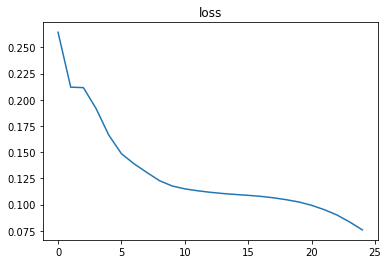

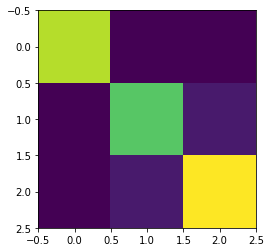

In [6]:
# Complete code below this comment  (Question #P5005)
# ----------------------------------

with tf.Session(config=tfconfig) as sess:
    features = tf.placeholder("float", (None, 4))
    labels = tf.placeholder("float", (None, 3))
    mlp = MultilayerPerceptron(sess, features, labels)
    sess.run(tf.global_variables_initializer())
    mlp.fit(X_train,y_train)
    
    plt.figure(figsize=(6,4))
    plt.title('loss')
    plt.plot(range(len(mlp.training_loss)), mlp.training_loss)
    
    plt.figure(figsize=(4,4))
    y_pred = mlp.predict(X_test)
    print('accuracy', accuracy_score(y_test,y_pred))
    plt.imshow(confusion_matrix(y_test,y_pred))

# Save your notebook!